In [6]:
import numpy as np
import keras
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
x = keras.layers.Input(shape=(3,))
y = keras.layers.Dense(5)(x)

model1 = keras.models.Model(x, y)
model1.trainable = True
model1.compile(optimizer='rmsprop', loss='mse')

data_x = np.random.random((10, 3))
data_y = np.random.random((10, 5))

model1.fit(data_x, data_y, nb_epoch=2)
out=model1.predict(data_x)
print (out)

x_in = keras.layers.Input(shape=(3,))
x = model1(x_in)
z = keras.layers.Dense(5)(x) 
model2 = keras.models.Model(x_in, z) 
model1.trainable = False
model2.compile(optimizer='rmsprop', loss='mse') 

data_z = np.ones((10, 3)) 
data_w = np.ones((10, 5)) 

model2.fit(data_z, data_w, nb_epoch=2) 

out=model1.predict(data_x)
print (out)


Epoch 1/2
10/10 [==============================] - 0s 9ms/step - loss: 0.4691
Epoch 2/2
10/10 [==============================] - 0s 183us/step - loss: 0.4620


/share/nanlh/work/pprli/pprli_env/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


[[ 0.20917599 -0.04587884 -0.09799321  0.05662837 -0.02374581]
 [ 0.88242626 -0.40930784 -0.8163238   0.52072084  0.9605296 ]
 [ 0.8849867  -0.57797045 -0.8832286   0.64306635  1.2705625 ]
 [ 0.7041614  -0.24311826 -0.56379443  0.329736    0.49644682]
 [ 0.705669   -0.43657365 -0.64613926  0.4730399   0.8658899 ]
 [ 0.61709213 -0.307736   -0.4826457   0.33470348  0.507547  ]
 [ 0.78872544 -0.55301744 -0.7916544   0.59656394  1.1809232 ]
 [ 0.29950112 -0.10182269 -0.2549695   0.15287651  0.24430947]
 [ 0.59854484 -0.38253406 -0.58218235  0.4262695   0.8200313 ]
 [ 0.80776215 -0.29881427 -0.7127334   0.4201519   0.7292265 ]]
Epoch 1/2
10/10 [==============================] - 0s 10ms/step - loss: 1.6182
Epoch 2/2
10/10 [==============================] - 0s 187us/step - loss: 1.5792
[[ 0.20917599 -0.04587884 -0.09799321  0.05662837 -0.02374581]
 [ 0.88242626 -0.40930784 -0.8163238   0.52072084  0.9605296 ]
 [ 0.8849867  -0.57797045 -0.8832286   0.64306635  1.2705625 ]
 [ 0.7041614  -0.2431

/share/nanlh/work/pprli/pprli_env/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


In [1]:
# That's an impressive list of imports.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
digits = load_digits()
print(digits.data.shape)
print(digits.target.shape)


(1797, 64)
(1797,)


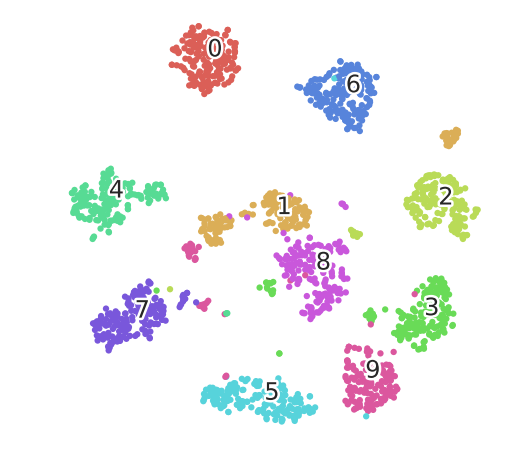

In [3]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

def visualize(x, y):
    x_embedded = TSNE(n_components=2).fit_transform(x)
    scatter(x_embedded, y)
visualize(digits.data, digits.target)

In [22]:
x = 4 * np.ones(6, dtype=np.int32)
print(x)
x = (x+1)%5
print(x)

[4 4 4 4 4 4]
[0 0 0 0 0 0]


In [30]:
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, BatchNormalization, Conv2D, Reshape, Dense,\
                         Dropout, Activation, Flatten, LeakyReLU, Add, MaxPooling2D,\
                         GlobalMaxPooling2D, Subtract, Concatenate, Average, Conv2DTranspose,\
                         GlobalAveragePooling2D
from keras.losses import categorical_crossentropy, mean_squared_error
from keras.models import Model
from keras import backend as K
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import Callback

from pathlib import Path
import numpy as np
from src.data.dataset import load_ferg
from src.evaluation.resnet import resnet_v1
from src import PROJECT_ROOT, EXPERIMENT_ROOT
import imageio
import os
from src.util.callbacks import Evaluate
from src.models.task import FergTask
import click

def empty_loss(y_true, y_pred):
    return y_pred
def make_trainable(net, val):
    net.trainable = val
    for l in net.layers:
        l.trainable = val
def show_model(model):
    print('-'*80)
    print(model.summary())
    print(model.metrics_names)
    print('-'*80)
def evaluate_encoder(train_data, test_data, num_classes, batch_size=256, num_epochs=20):
    decoder = build_classifier(num_classes)
    x_train, y_train = train_data
    x_test, y_test = test_data
    decoder.compile(optimizer=Adam(1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
    history = decoder.fit(x=x_train, y=y_train, epochs=num_epochs,batch_size=batch_size,\
                validation_data=(x_test, y_test),verbose=0)
    return np.max(history.history['val_acc'])

def shuffling(x):
    idxs = K.arange(0, K.shape(x)[0])
    idxs = K.tf.random_shuffle(idxs)
    return K.gather(x, idxs)
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon
def kl_loss_func(args):
    z_mean, z_log_var = args
    loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return loss

def spectral_norm(w, r=5):
    w_shape = K.int_shape(w)
    in_dim = np.prod(w_shape[:-1]).astype(int)
    out_dim = w_shape[-1]
    w = K.reshape(w, (in_dim, out_dim))
    u = K.ones((1, in_dim))
    for i in range(r):
        v = K.l2_normalize(K.dot(u, w))
        u = K.l2_normalize(K.dot(v, K.transpose(w)))
    return K.sum(K.dot(K.dot(u, w), K.transpose(v)))


def spectral_normalization(w):
    return w / spectral_norm(w)


class AeGan(FergTask):
    def __init__(self, data_loader, z_dim=128, kl_loss_weight=0.001, debug=False):
        self.z_dim = z_dim
        self.kl_loss_weight = kl_loss_weight
        super().__init__(data_loader, debug)
    def build_model(self):
        input_shape = self.input_shape
        img_dim = self.img_dim
        z_dim = self.z_dim
        num_p = self.num_p
        encoder = self.build_encoder(input_shape, z_dim)
        decoder = self.build_decoder(z_dim, img_dim, num_p)
        classifier = self.build_classifier(input_shape, num_p, z_dim)
        generator = self.build_generator(input_shape, num_p, encoder, decoder, classifier)
        discriminator = self.build_discriminator(input_shape, num_p, classifier)
        model = [encoder, decoder, classifier, generator, discriminator]
        return model
    def summary(self):
        for model in self.model:
            model.summary()
            print('-' * 80)
    def build_encoder(self, input_shape, z_dim):
        x_in = Input(input_shape)
        x = x_in
        field_size = 8
        for i in range(3):
            x = Conv2D(int(z_dim / 2**(2-i)),
                       kernel_size=(field_size, field_size),
                       padding='SAME')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU(0.2)(x)
            x = MaxPooling2D((2, 2))(x)
        x = GlobalMaxPooling2D()(x)
        x = Dense(z_dim)(x)
        return Model(x_in, x)
        #z_mean = Dense(z_dim)(x)
        #z_log_var = Dense(z_dim)(x)
        #sample = Lambda(sampling)([z_mean, z_log_var])
        #return Model(x_in, [sample, z_mean, z_log_var])
    def build_decoder(self, z_dim, img_dim, num_p):
        k = 8
        units = z_dim
        x_in = Input(shape=(z_dim,))
        p_in =Input(shape=(num_p,))
        h = Concatenate()([x_in, p_in])
        h = Dense(4 * 4 * 128, activation='relu')(h)
        h = Reshape((4, 4, 128))(h)
        # h = LeakyReLU(0.2)(h)
        h = Conv2DTranspose(units, (k, k), strides=(2, 2), padding='same', activation='relu')(h)  # 32*32*64
        # h = Dropout(dropout)(h)
        h = BatchNormalization(momentum=0.8)(h)
        # h = LeakyReLU(0.2)(h)
        # h = UpSampling2D(size=(2, 2))(h)
        h = Conv2DTranspose(units // 2, (k, k), strides=(2, 2), padding='same', activation='relu')(h)  # 64*64*64
        # h = Dropout(dropout)(h)
        h = BatchNormalization(momentum=0.8)(h)
        # h = LeakyReLU(0.2)(h)
        # h = UpSampling2D(size=(2, 2))(h)
        h = Conv2DTranspose(units // 2, (k, k), strides=(2, 2), padding='same', activation='relu')(h)  # 8*6*64
        # h = Dropout(dropout)(h)
        h = BatchNormalization(momentum=0.8)(h)

        h = Conv2DTranspose(3, (k, k), strides=(2, 2), padding='same', activation='tanh')(h)  # 8*6*64
        return Model([x_in, p_in], h)
    def build_classifier(self, input_shape, num_p, z_dim):
        x_in = Input(shape=input_shape)
        x = x_in
        field_size = 8
        for i in range(3):
            x = Conv2D(int(z_dim / 2**(2-i)),
                       kernel_size=(field_size, field_size),
                       kernel_constraint=spectral_normalization,
                       padding='SAME')(x)
            x = BatchNormalization(gamma_constraint=spectral_normalization)(x)
            x = LeakyReLU(0.2)(x)
            x = MaxPooling2D((2, 2))(x)
        x = GlobalMaxPooling2D()(x)
        predict_p = Dense(num_p, activation='softmax')(x)
        predict_q = Dense(1, use_bias=False, kernel_constraint=spectral_normalization)(x)
        return Model(x_in, [predict_p, predict_q])
    def build_generator(self, input_shape, num_p, encoder, decoder, classifier):
        x_in = Input(shape=input_shape)
        p_in_real = Input(shape=(num_p,))
        p_in_fake = Input(shape=(num_p,))
        x = x_in
        x = encoder(x)
        x_hat_fake = decoder([x, p_in_fake])
        x_hat_real = decoder([x, p_in_real])
        def mse_loss_func(args):
            y_true, y_pred = args
            return K.mean(K.square(y_pred - y_true))
        mse_loss = Lambda(mse_loss_func, name='mse')([x_hat_real, x_in])
        fake_p, fake_q = classifier(x_hat_fake)
        def p_loss_func(args):
            y_true, y_pred = args
            return K.mean(categorical_crossentropy(y_true, y_pred))
        p_loss = Lambda(p_loss_func)([p_in_fake, fake_p])
        def q_loss_func(args):
            fake_q = args
            return K.mean(- fake_q)
        q_loss = Lambda(q_loss_func)(fake_q)
        def add_func(args):
            p_loss, q_loss, mse_loss = args
            return p_loss + q_loss + mse_loss
        loss = Lambda(add_func)([p_loss, q_loss, mse_loss])
        model = Model([x_in, p_in_real, p_in_fake], loss)
        classifier.trainable = False
        model.compile(optimizer=Adam(1e-4), loss=empty_loss)
        return model
    def build_discriminator(self, input_shape, num_p, classifier):
        x_fake = Input(shape=input_shape)
        p_fake = Input(shape=(num_p,))
        x_sample = Input(shape=input_shape)
        p_sample = Input(shape=(num_p,))
        
        p_fake_pre, q_fake_pre = classifier(x_fake)
        p_sample_pre, q_sample_pre = classifier(x_sample)
        #p_loss
        def p_loss_func(args):
            y_true, y_pred = args
            return K.mean(categorical_crossentropy(y_true, y_pred))
        p_loss_layer = Lambda(p_loss_func)
        p_loss_fake = p_loss_layer([p_fake, p_fake_pre])
        p_loss_sample = p_loss_layer([p_sample, p_sample_pre])
        def average_loss_func(args):
            p_loss_fake, p_loss_sample = args
            return (p_loss_fake+p_loss_sample)/2
        p_loss = Lambda(average_loss_func)([p_loss_fake, p_loss_sample])
        #q_loss
        def q_loss_func(args):
            q_sample_pre, q_fake_pre = args
            return K.mean(q_fake_pre - q_sample_pre)
        q_loss = Lambda(q_loss_func)([q_sample_pre, q_fake_pre])
        def add_func(args):
            p_loss, q_loss = args
            return p_loss+q_loss
        loss = Lambda(add_func)([p_loss, q_loss])
        model = Model([x_fake, p_fake, x_sample, p_sample], loss)
        classifier.trainable = True
        model.compile(optimizer=Adam(1e-4), loss=empty_loss)
        return model
        
    def predict(self, x, p_fake=None):
        encoder, decoder, classifier, generator, discriminator = self.model
        z = encoder.predict(x)
        batch_size = x.shape[0]
        if p_fake is None:
            p_fake = np.random.randint(self.num_p, size=batch_size)
            p_fake = to_categorical(p_fake, self.num_p)
        x_hat_fake = decoder.predict([z, p_fake])
        return x_hat_fake
    def train(self, sample_dir=None, model_path=None, total_iter=200000, batch_size=128, iters_per_sample=1000):
        #unfinished
        sample_dir = EXPERIMENT_ROOT / type(self).__name__ / 'sample'
        sample_dir.mkdir(parents=True, exist_ok=True)
        model_path = EXPERIMENT_ROOT / type(self).__name__ / 'best.h5'
        model_path.parent.mkdir(parents=True, exist_ok=True)
        
        z_dim = self.z_dim
        encoder, decoder, classifier, generator, discriminator = self.model
        x_train, y_train, p_train = self.train_data
        for i in range(total_iter):
            idx1 = np.random.choice(x_train.shape[0], batch_size, replace=False)
            idx2 = np.random.choice(x_train.shape[0], batch_size, replace=False)
            p_fake = np.random.randint(self.num_p, size=batch_size)
            p_fake = to_categorical(p_fake, self.num_p)
            x_fake = self.predict(x_train[idx1], p_fake=p_fake)
            for j in range(5):
                d_loss = discriminator.train_on_batch([x_fake, p_fake, x_train[idx2], p_train[idx2]], p_train[idx1])
            for j in range(1):
                p_fake = np.random.randint(self.num_p, size=batch_size)
                p_fake= to_categorical(p_fake, self.num_p)
                g_loss = generator.train_on_batch([x_train[idx1], p_train[idx1], p_fake], p_train[idx1])
            if i % 1 == 0:
                print ('iter: %s, d_loss: %s, g_loss: %s' % (i, d_loss, g_loss))
            if i % iters_per_sample == 0:
                self.sample_all(sample_dir / f'{i}.png')
        g_train_model.save_weights('./g_train_model.weights')
            
def main(gpu='3', total_iter=200000, debug=False):
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu
    loader = load_ferg()
    ae_gan = AeGan(loader, debug=debug)
    #vae.summary()
    ae_gan.train()
    #acc_y_on_x = vae.evaluate_y_on_x()
    #acc_p_on_x = vae.evaluate_p_on_x()
    #print(f'acc_y_on_x = {acc_y_on_x}, acc_p_on_x={acc_p_on_x}')
main(debug=False)

iter: 0, d_loss: 1.1619673, g_loss: 2.6499748


iter: 1, d_loss: 0.7598796, g_loss: 2.3790529
iter: 2, d_loss: 0.33013046, g_loss: 2.2660987
iter: 3, d_loss: -0.15972137, g_loss: 2.2375674
iter: 4, d_loss: -0.6943612, g_loss: 2.1725602
iter: 5, d_loss: -1.046011, g_loss: 2.1967733
iter: 6, d_loss: -1.69959, g_loss: 2.1659462
iter: 7, d_loss: -1.8935342, g_loss: 2.187563
iter: 8, d_loss: -2.5547745, g_loss: 2.1548007
iter: 9, d_loss: -2.5946853, g_loss: 2.1364574
iter: 10, d_loss: -3.197938, g_loss: 2.030978
iter: 11, d_loss: -3.111682, g_loss: 2.0165043
iter: 12, d_loss: -3.6269517, g_loss: 1.8648634
iter: 13, d_loss: -3.5609584, g_loss: 1.9107238
iter: 14, d_loss: -4.0567017, g_loss: 1.786227
iter: 15, d_loss: -3.8665533, g_loss: 1.9188635
iter: 16, d_loss: -4.339187, g_loss: 1.6688561
iter: 17, d_loss: -4.00148, g_loss: 1.9733388
iter: 18, d_loss: -4.560177, g_loss: 1.5295339
iter: 19, d_loss: -4.0432878, g_loss: 2.01428
iter: 20, d_loss: -4.797739, g_loss: 1.4840455
iter: 21, d_loss: -4.517222, g_loss: 1.7450576
iter: 22, d_loss:

KeyboardInterrupt: 

In [11]:
import numpy as np
np.random.choice()

"\n        choice(a, size=None, replace=True, p=None)\n\n        Generates a random sample from a given 1-D array\n\n                .. versionadded:: 1.7.0\n\n        Parameters\n        -----------\n        a : 1-D array-like or int\n            If an ndarray, a random sample is generated from its elements.\n            If an int, the random sample is generated as if a were np.arange(a)\n        size : int or tuple of ints, optional\n            Output shape.  If the given shape is, e.g., ``(m, n, k)``, then\n            ``m * n * k`` samples are drawn.  Default is None, in which case a\n            single value is returned.\n        replace : boolean, optional\n            Whether the sample is with or without replacement\n        p : 1-D array-like, optional\n            The probabilities associated with each entry in a.\n            If not given the sample assumes a uniform distribution over all\n            entries in a.\n\n        Returns\n        --------\n        samples : sin